# **New York City TLC Project**
**Statistical Review and A/B Testing**

## Overview

The consulting firm Automatidata recent project for the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

Uli King, Automatidata’s project manager, informs the team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes the specific assignment: to conduct an A/B test. 

# Statistical analysis

**The purpose** of this project is to demonstrate knowledge of how to prepare, create, and analyze A/B tests. the A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** We assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 
<br>1) customers who are required to pay with credit card
<br>2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

# **Conduct an A/B test**


# **PACE stages**

We apply the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## PACE: Plan 

In this stage, we consider the following questions where applicable to complete our code response:
1. What is the research question for this data project?

<font color=#FFB6C1> 
        Whether there is a relationship between payment type and fare amount.

### Task 1. Imports and data loading

In [12]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# Load dataset into dataframe
taxi_data = pd.read_csv(R"C:\Users\spectre\Downloads\2017_Yellow_Taxi_Trip_Data_Cleaned.csv", index_col = 0)

## PACE: **Analyze and Construct**

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



<Axes: xlabel='payment_type', ylabel='count'>

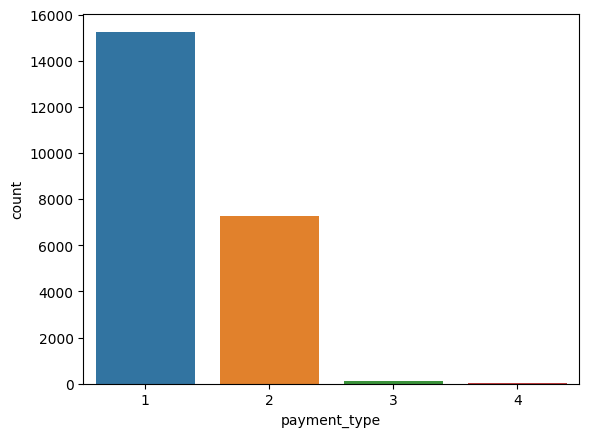

In [18]:
# Plot the payment_type distribution
sns.countplot(x = 'payment_type', data = taxi_data)

In [6]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

You are interested in the relationship between payment type and the total fare amount the customer pays. One approach is to look at the average total fare amount for each payment type. 

In [9]:
# Compute the average total_amount for each payment_type
taxi_data.groupby('payment_type')['total_amount'].mean()

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger total fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in total fare amount. To assess whether the difference is statistically significant, we conduct a hypothesis test.


### Task 3. Hypothesis testing

We will conduct a two-sample t-test following the steps below : 

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a significance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 

**Note:** For this specific project, the hypothesis test is the main component of our A/B test.

#### 3.1. State the null hypothesis and the alternative hypothesis

<font color=FFB6C1>

$H_0$: There is no difference in the average total fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average total fare amount between customers who use credit cards and customers who use cash.

#### 3.2. Choose the significance level
We choose 5% as the significance level and proceed with a two-sample t-test.

In [10]:
# The significance level is 0.05
significance_level = 0.05

In [13]:
# Create a sample for each payment type
payment_type_1 = taxi_data[taxi_data['payment_type'] == 1]['total_amount']
payment_type_2 = taxi_data[taxi_data['payment_type'] == 2]['total_amount']

#### 3.3. Find the p-value

In [1]:
# Compute the p-value
p_value = stats.ttest_ind(payment_type_1, payment_type_2, equal_var=False)[1]
p_value

NameError: name 'stats' is not defined

#### 3.4. Reject or fail to reject the null hypothesis

<font color=#FFB6C1>
The p-value is equal to 4.53, which is smaller than 5%. Therefore, we reject the null hypothesis in favor of the alternative hypothesis, we have sufficient evidence to conclude that there is a difference in the average total fare amount between customers who use credit cards and customers who use cash.

## PACE: **Execute**

### Task 4. Communicate insights with stakeholders

There is a statistically significant difference in the average total fare between customers who use credit cards and customers who use cash. Customers who used credit cards showed a higher total amount compared to cash.

### Recommendations for the stakeholders:
    * We recommend to the stakeholders that They should consider other factors that might affect the total fare amount such as the distance of the trip, the time of the day, the day of the week, the weather, neighborhood, etc.
    * The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.